# **Condo Sales prediction in metropolitan areas of Bangkok**




# Project Description

This is an uncompleted work of Group A's midterm project.
Now, it is continued as an individual project by Thant Sin Tun.

Due to the country's situation of Myanmar, there is an excessive migration to Thailand during the past three years. Consequently, there is an increase in high demands on living places(housing/condo).

By consdiering the above reasons, my model is designed to predict the price of condo in the urban areas of Bangkok, Thailand.

The majority of migrants could be assumed as students while some are refugees and workers. However, my model is trained to highly benefit especially students and families with 4 to 5 members.

The dataset of the model is created through the collections of condo sales data from the real estate websites of Thailand. Our focus areas are Bangkok and Pathum Thani provinces where popular universities exist. Following are the sources of our dataset :

Dot property https://www.dotproperty.com.my/

---


Thailand property https://www.thailand-property.com/

---


Ddproperty https://www.ddproperty.com/en

---


Property Scout https://propertyscout.co.th/en/

---


Freshbangkok.com https://freshbangkok.com/

Dataset contains five features. In this regression model, three features('Area', 'Furnish', and 'Floor') are trained as independent variables while 'Price' is regarded as our target/dependent variable.



In the future, I expect this model could effectively predict the housing/condo prices with high accuracy after evaluating the results until success.

# Import the libraries

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Understand the Data

In [217]:
df = pd.read_csv("/content/5 features condo info final.csv")

In [218]:
# Print the number of features, number of data points
print(df.shape)

# Print the information of the dataset and check data types
df.info()

df.describe()

(200, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Bedroom   200 non-null    int64  
 1   Bathroom  200 non-null    int64  
 2   Area      200 non-null    float64
 3   Furnish   200 non-null    object 
 4   Floor     200 non-null    int64  
 5   Price     200 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


,Bedroom,Bathroom,Area,Floor,Price
count,200.000000,200.000000,200.000000,200.000000,2.000000e+02
mean,1.230000,1.235000,44.214850,9.460000,4.580147e+06
std,0.546437,0.501029,29.319684,8.759684,4.888913e+06
min,0.000000,1.000000,21.000000,1.000000,1.227000e+05
25%,1.000000,1.000000,28.000000,4.000000,1.500000e+06
50%,1.000000,1.000000,33.130000,7.000000,2.444741e+06
75%,2.000000,1.000000,49.907500,11.250000,6.350000e+06
max,3.000000,4.000000,265.000000,43.000000,2.900000e+07


In [219]:
print(df)

     Bedroom  Bathroom   Area Furnish  Floor     Price
0          1         1   30.5     Yes     24   6500000
1          1         1   44.0     Yes     22   6200000
2          1         1   34.0     Yes     15   6800000
3          1         1   31.0     Yes     14   4490000
4          1         1   29.0     Yes     16   4150000
..       ...       ...    ...     ...    ...       ...
195        1         1   28.0     Yes      5   1250000
196        1         1   28.0     Yes      3    700000
197        2         2  139.0     Yes     17  29000000
198        2         2   92.0     Yes     15  19000000
199        2         2   78.0     Yes     32  16250000

[200 rows x 6 columns]


In [220]:
df.head()

,Bedroom,Bathroom,Area,Furnish,Floor,Price
0,1,1,30.5,Yes,24,6500000
1,1,1,44.0,Yes,22,6200000
2,1,1,34.0,Yes,15,6800000
3,1,1,31.0,Yes,14,4490000
4,1,1,29.0,Yes,16,4150000


In [221]:
# Clean the columns names
df.columns = [name.strip() for name in list(df.columns)]
print(df.columns)

Index(['Bedroom', 'Bathroom', 'Area', 'Furnish', 'Floor', 'Price'], dtype='object')


In [222]:
df.size

1200

In [223]:
df.dtypes

Bedroom       int64
Bathroom      int64
Area        float64
Furnish      object
Floor         int64
Price         int64
dtype: object

In [224]:
# Checking for missing value
df.isnull().isnull().sum()

Bedroom     0
Bathroom    0
Area        0
Furnish     0
Floor       0
Price       0
dtype: int64

In [225]:
df[df['Furnish']=='Yes'].size

948

In [227]:
df[df['Furnish']=='No'].size

216

Since total datapoint is 1200, now it is just 948+216 = 1164.
Therefore, I try to solve what is missing.

In [229]:
df['Furnish'].unique()

array(['Yes', 'No', 'yes'], dtype=object)

In [228]:
df[df['Furnish']=='yes'].size # Now, I could fix it.

36

# Data Preprocesssing (Scaling)

In [47]:
new_df = df

In [48]:
new_df['Furnish'].replace({'Yes':1, 'yes':1, 'No':0}, inplace=True)

In [49]:
new_df.head()

,Bedroom,Bathroom,Area,Furnish,Floor,Price
0,1,1,30.5,1,24,6500000
1,1,1,44.0,1,22,6200000
2,1,1,34.0,1,15,6800000
3,1,1,31.0,1,14,4490000
4,1,1,29.0,1,16,4150000


In [50]:
new_df['Furnish'].unique()

array([1, 0])

# Data Cleaning (Removing outliers)

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Area'>

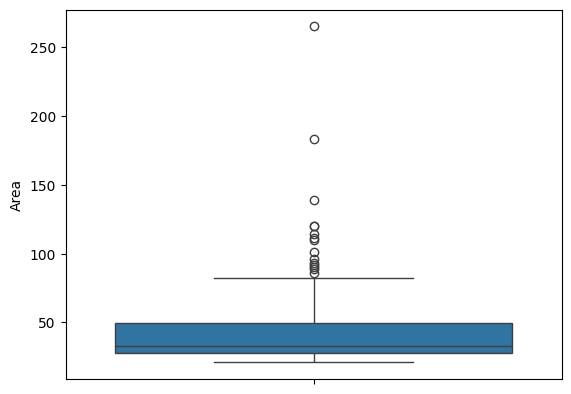

In [122]:
sns.boxplot(new_df, y='Area')

In [114]:
import numpy as np

In [115]:
Q1 = np.percentile(new_df['Area'], 25, interpolation='midpoint')
Q3 = np.percentile(new_df['Area'], 75, interpolation='midpoint')

In [116]:
IQR = Q3 - Q1 # To detect outliers

In [117]:
lowerbound = Q1 = 1.5 * IQR
upperbound = Q3 + 1.5 * IQR

In [118]:
update_df = new_df[(new_df['Area'] < upperbound) & new_df['Area'] > lowerbound]

In [120]:
update_df.head # No data point

<bound method NDFrame.head of Empty DataFrame
Columns: [Bedroom, Bathroom, Area, Furnish, Floor, Price]
Index: []>

To be honest, I have no idea how to fix this. Therefore, I googled and tried some methods.

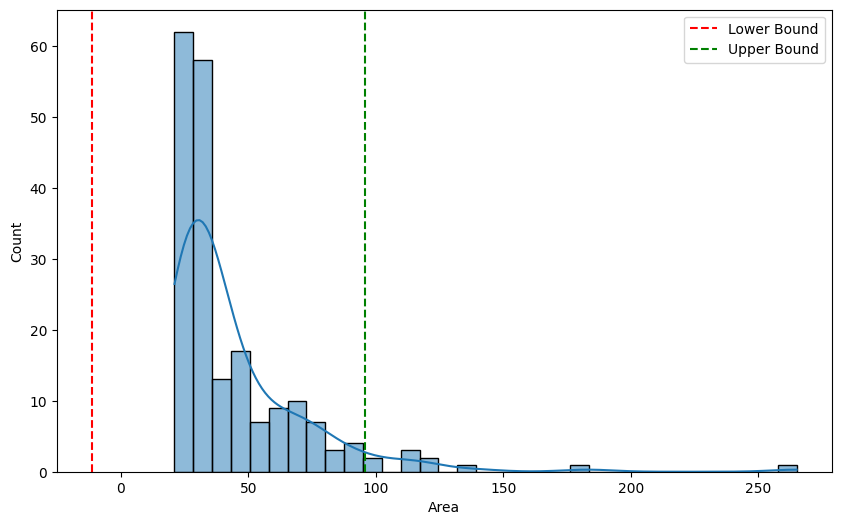

In [123]:
# Adjust the IQR multiplier
multiplier = 2.0  # or try different values

# Recalculate the bounds
lower_bound = Q1 - multiplier * IQR
upper_bound = Q3 + multiplier * IQR

# Filter the dataset again
filtered_df = df[(df['Area'] >= lower_bound) & (df['Area'] <= upper_bound)]

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Area'], kde=True)
plt.axvline(lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='g', linestyle='--', label='Upper Bound')
plt.legend()
plt.show()


In [125]:
# Then, print filtered_df
filtered_df.shape

(190, 6)

In [126]:
filtered_df.head() # Now, it works.

,Bedroom,Bathroom,Area,Furnish,Floor,Price
0,1,1,30.5,1,24,6500000
1,1,1,44.0,1,22,6200000
2,1,1,34.0,1,15,6800000
3,1,1,31.0,1,14,4490000
4,1,1,29.0,1,16,4150000


For Price features

<Axes: ylabel='Price'>

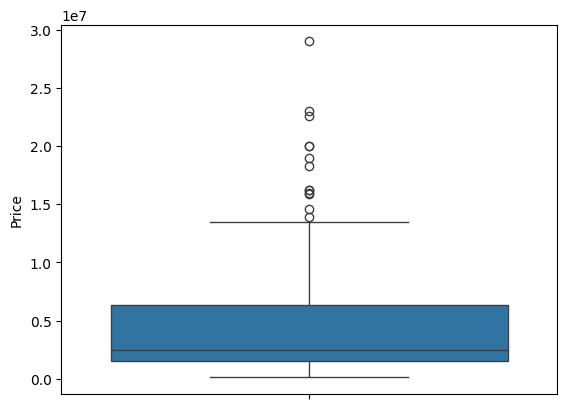

In [291]:
sns.boxplot(new_df, y='Price')

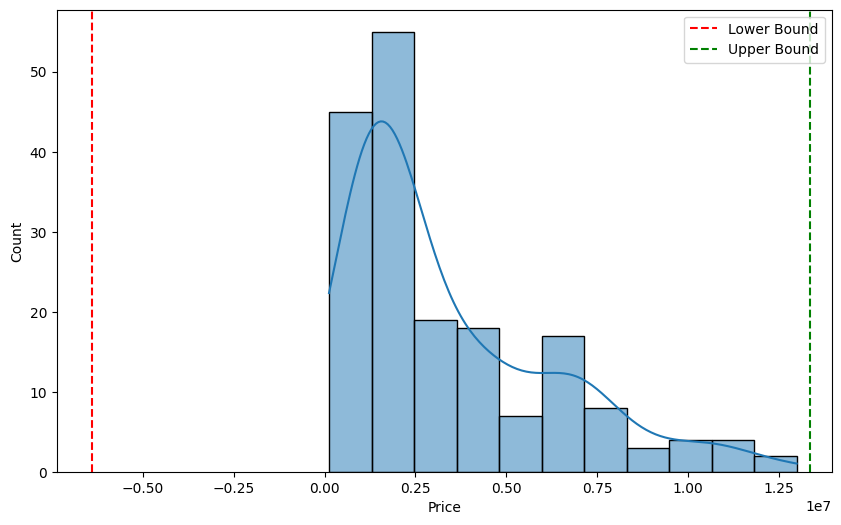

In [293]:
# Adjust the IQR multiplier
multiplier = 2.0  # or try different values

Q1_price = np.percentile(filtered_df['Price'], 25, interpolation='midpoint')
Q3_price = np.percentile(filtered_df['Price'], 75, interpolation='midpoint')

IQRp = Q3_price - Q1_price

# Recalculate the bounds
price_lb = Q1_price - multiplier * IQRp
price_ub = Q3_price + multiplier * IQRp

# Filter the dataset again
filtered_df2 = filtered_df[(filtered_df['Price'] >= price_lb) & (filtered_df['Price'] <= price_ub)]

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df2['Price'], kde=True)
plt.axvline(price_lb, color='r', linestyle='--', label='Lower Bound')
plt.axvline(price_ub, color='g', linestyle='--', label='Upper Bound')
plt.legend()
plt.show()

In [295]:
filtered_df2.shape

(182, 6)

# Data Splitting

In [296]:
X_feature = ['Area', 'Floor', 'Furnish']
X = filtered_df2[X_feature].values
y = filtered_df2['Price'].values

In [495]:
# Import the library to split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, # I try different testing sizes (0.2, 0.3 and 0.4)
                                                    random_state=42) # Test size 0.4 and order 2 is best at the moment

In [496]:
X_train.shape

(145, 3)

In [497]:
X_test.shape

(37, 3)

# Feature Scaling

In [498]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler # I used standardscaler method
scale = StandardScaler()
X_scaled = scale.fit_transform(X_train)

In [499]:
# Poly transformation
from sklearn.preprocessing import PolynomialFeatures
order = 2

poly = PolynomialFeatures(degree=order, include_bias=False)
X_transformed = poly.fit_transform(X_scaled)

# Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_transformed, y_train)

LinearRegression()

In [500]:
# Next, I calculate best parameters
best_parameters = [model.coef_, model.intercept_]

# print the values of the parameters
print(best_parameters)

[array([ 1.81817512e+06,  1.26860783e+06,  6.29557617e+18, -3.76621878e+05,
        9.20955554e+04,  4.60110343e+05, -1.72242164e+05,  4.91134332e+05,
        3.76541362e+18]), -3.7654136154571156e+18]


In [501]:
# Train the model

#predict the target for the training data
ytrain_pred = model.predict(X_transformed)


# predict the target for the testing data
X_test_scaled = scale.transform(X_test)
X_test_transformed = poly.transform(X_test_scaled)
ytest_pred = model.predict(X_test_transformed)

# Visualize the result
Since I used three features and one target in this model, I do not have enough capacity to visualize the results.



In [502]:
# This code should be run only while you are using only one feature
# import matplotlib for visualization

"""
import matplotlib.pyplot as plt
import numpy as np

plt.plot(X,y, '*')

x_model = np.linspace(df[sel_feature].min(), df[sel_feature].max(), 50)
x_model_scaled = scale.transform(x_model.reshape(-1,1))
x_model_poly  = poly.transform(x_model_scaled)
y_model = model.predict(x_model_poly)

plt.plot(x_model,  y_model, color = 'k')
plt.legend(['actual data', 'predicted data using the poly model with degree ' + str(order)])
plt.show()
"""

"\nimport matplotlib.pyplot as plt\nimport numpy as np\n\nplt.plot(X,y, '*')\n\nx_model = np.linspace(df[sel_feature].min(), df[sel_feature].max(), 50)\nx_model_scaled = scale.transform(x_model.reshape(-1,1))\nx_model_poly  = poly.transform(x_model_scaled)\ny_model = model.predict(x_model_poly)\n\nplt.plot(x_model,  y_model, color = 'k')\nplt.legend(['actual data', 'predicted data using the poly model with degree ' + str(order)])\nplt.show()\n"

In [503]:
# This code should be run while you are using more than one feature.
"""
import matplotlib.pyplot as plt

plt.plot(ytrain_pred,  y_train, 'k*')
plt.plot(ytest_pred,  y_test, 'r*')
plt.title("Predicted value vs. Actual value")
plt.legend(["Training data", "Testing data"])
plt.show()
"""

'\nimport matplotlib.pyplot as plt\n\nplt.plot(ytrain_pred,  y_train, \'k*\')\nplt.plot(ytest_pred,  y_test, \'r*\')\nplt.title("Predicted value vs. Actual value")\nplt.legend(["Training data", "Testing data"])\nplt.show()\n'

# Evaluate the result using metrics

In [505]:
# import the required modules
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# evauate on the training set

mae = mean_absolute_error(y_train, ytrain_pred)
print('Mean absolute error: ', mae)

mse = mean_squared_error(y_train, ytrain_pred)
print('Mean squared error: ', mse)

r2 = r2_score(y_train, ytrain_pred)
print('R2 score is: ', r2)

# evauate on the testing set
mae = mean_absolute_error(y_test, ytest_pred)
print('Mean absolute error: ', mae)

mse = mean_squared_error(y_test, ytest_pred)
print('Mean squared error: ', mse)

r2 = r2_score(y_test, ytest_pred)
print('R2 score is: ', r2)

Mean absolute error:  1065858.4206896552
Mean squared error:  2271854727710.9727
R2 score is:  0.7035180966700343
Mean absolute error:  1245438.5135135136
Mean squared error:  3092711276676.3516
R2 score is:  0.6567051861312133


This is the best scores so far after I tested with different orders and test size. Further evaluation is required.

In [289]:
# The best model that I have obtained for this project is:
print(f"The best model that I have obtained for this project is {order}.")

The best model that I have obtained for this project is 2.


# # I think that I need to increase my dataset to evaluate my model accuracy.